<a href="https://colab.research.google.com/github/23x51a05c1-eng/Chandra-shekar/blob/main/Copy_of_Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

RESULTS BEFORE PARAMETER TUNING
Accuracy: 0.9066666666666666

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90        72
           1       0.91      0.91      0.91        78

    accuracy                           0.91       150
   macro avg       0.91      0.91      0.91       150
weighted avg       0.91      0.91      0.91       150

Confusion Matrix:
 [[65  7]
 [ 7 71]]

Best Parameters Found: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}

RESULTS AFTER PARAMETER TUNING
Accuracy: 0.92

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.90      0.92        72
           1       0.91      0.94      0.92        78

    accuracy                           0.92       150
   macro avg       0.92      0.92      0.92       150
weighted avg       0.92      0.92      0.92       150

Confusion Matrix:
 [[65  7]
 [ 5 73]]


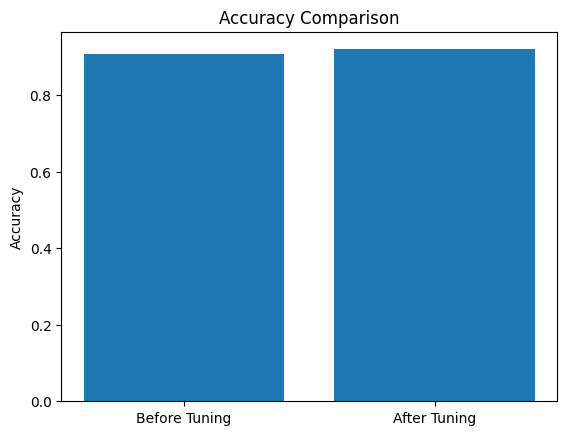

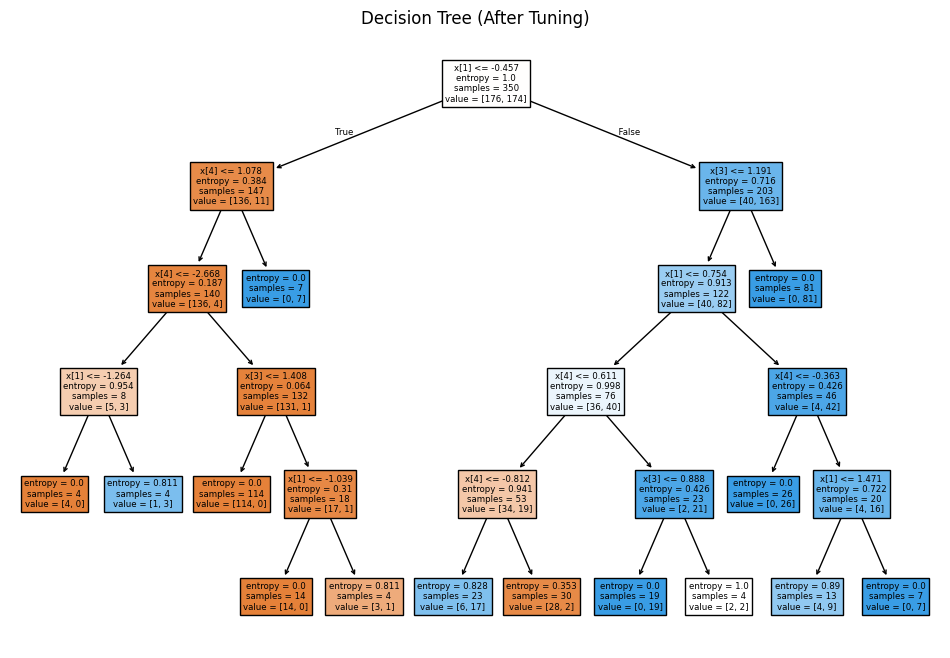

In [ ]:
# ===============================================
# Decision Tree Classification with Parameter Tuning
# ===============================================

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# -----------------------------------------------
# 1. Generate Classification Dataset
# -----------------------------------------------
X, y = make_classification(n_samples=500,
                           n_features=5,
                           n_informative=3,
                           n_redundant=0,
                           n_classes=2,
                           random_state=42)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

# -----------------------------------------------
# 2. Train Basic Decision Tree
# -----------------------------------------------
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predictions before tuning
y_pred = dt_model.predict(X_test)

print("====================================")
print("RESULTS BEFORE PARAMETER TUNING")
print("====================================")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


# -----------------------------------------------
# 3. Hyperparameter Tuning using GridSearchCV
# -----------------------------------------------
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

print("\nBest Parameters Found:", grid_search.best_params_)

# -----------------------------------------------
# 4. Train Model with Best Parameters
# -----------------------------------------------
best_dt = grid_search.best_estimator_
y_pred_tuned = best_dt.predict(X_test)

print("\n====================================")
print("RESULTS AFTER PARAMETER TUNING")
print("====================================")
print("Accuracy:", accuracy_score(y_test, y_pred_tuned))
print("\nClassification Report:\n", classification_report(y_test, y_pred_tuned))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tuned))


# -----------------------------------------------
# 5. Compare Accuracy Before vs After Tuning
# -----------------------------------------------
accuracy_before = accuracy_score(y_test, y_pred)
accuracy_after = accuracy_score(y_test, y_pred_tuned)

plt.figure()
plt.bar(["Before Tuning", "After Tuning"],
        [accuracy_before, accuracy_after])
plt.title("Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()


# -----------------------------------------------
# 6. Visualize Tuned Decision Tree
# -----------------------------------------------
plt.figure(figsize=(12,8))
plot_tree(best_dt, filled=True)
plt.title("Decision Tree (After Tuning)")
plt.show()


RESULTS BEFORE PARAMETER TUNING
MSE: 7700.6252217717465
R2 Score: -0.8933459552674943

Best Parameters Found: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 10}

RESULTS AFTER PARAMETER TUNING
MSE: 4240.627086986786
R2 Score: -0.04263925482883257


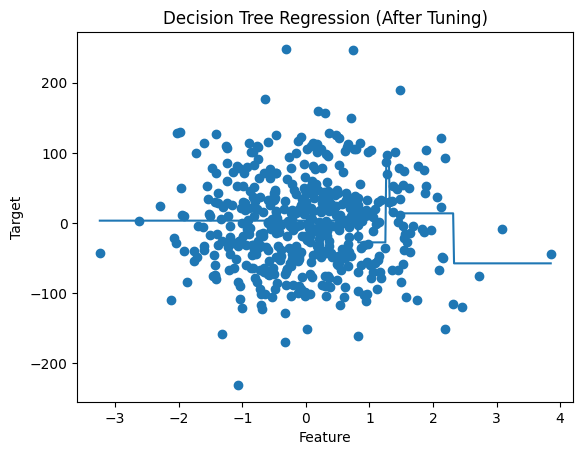

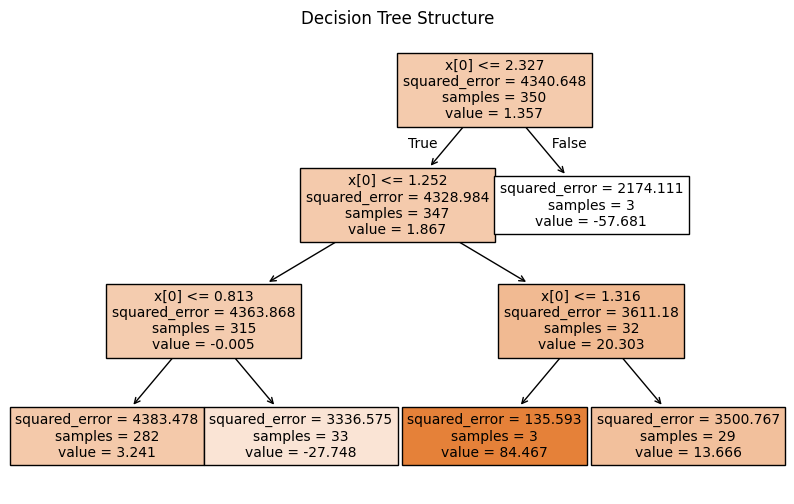

In [ ]:
# =========================================================
# Decision Tree Regression with Parameter Tuning
# =========================================================

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score

# ---------------------------------------------------------
# 1. Generate Regression Dataset
# ---------------------------------------------------------
X, y = make_regression(n_samples=500,
                       n_features=1,
                       noise=20,
                       random_state=42)

# Sort values for better visualization
X = np.sort(X, axis=0)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

# ---------------------------------------------------------
# 2. Train Basic Decision Tree Regressor
# ---------------------------------------------------------
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train)

# Predictions before tuning
y_pred = dt_reg.predict(X_test)

print("====================================")
print("RESULTS BEFORE PARAMETER TUNING")
print("====================================")
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

# ---------------------------------------------------------
# 3. Hyperparameter Tuning using GridSearchCV
# ---------------------------------------------------------
param_grid = {
    'max_depth': [None, 3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=DecisionTreeRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='r2',
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

print("\nBest Parameters Found:", grid_search.best_params_)

# ---------------------------------------------------------
# 4. Train Tuned Model
# ---------------------------------------------------------
best_dt_reg = grid_search.best_estimator_
y_pred_tuned = best_dt_reg.predict(X_test)

print("\n====================================")
print("RESULTS AFTER PARAMETER TUNING")
print("====================================")
print("MSE:", mean_squared_error(y_test, y_pred_tuned))
print("R2 Score:", r2_score(y_test, y_pred_tuned))

# ---------------------------------------------------------
# 5. Visualization of Regression Results
# ---------------------------------------------------------
X_range = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)
y_range_pred = best_dt_reg.predict(X_range)

plt.figure()
plt.scatter(X, y)
plt.plot(X_range, y_range_pred)
plt.title("Decision Tree Regression (After Tuning)")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.show()

# ---------------------------------------------------------
# 6. Visualize the Decision Tree Structure
# ---------------------------------------------------------
plt.figure(figsize=(10, 6))
plot_tree(best_dt_reg, filled=True)
plt.title("Decision Tree Structure")
plt.show()


RANDOM FOREST - CLASSIFICATION
Accuracy: 0.9266666666666666

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.90      0.92        71
           1       0.91      0.95      0.93        79

    accuracy                           0.93       150
   macro avg       0.93      0.93      0.93       150
weighted avg       0.93      0.93      0.93       150


RANDOM FOREST - REGRESSION
MSE: 5608.937440374923
R2 Score: -0.37906451882083947


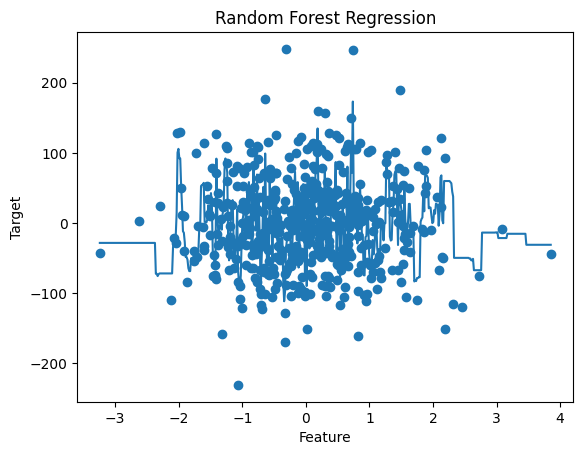

In [ ]:
# ============================================================
# Random Forest for Classification and Regression
# ============================================================

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification, make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import mean_squared_error, r2_score

# ============================================================
# PART 1: RANDOM FOREST CLASSIFICATION
# ============================================================

print("=================================================")
print("RANDOM FOREST - CLASSIFICATION")
print("=================================================")

# Generate classification dataset
X_cls, y_cls = make_classification(n_samples=500,
                                   n_features=5,
                                   n_informative=3,
                                   n_classes=2,
                                   random_state=42)

# Split dataset
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
    X_cls, y_cls, test_size=0.3, random_state=42)

# Train Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100,
                                max_depth=None,
                                random_state=42)

rf_clf.fit(X_train_cls, y_train_cls)

# Predictions
y_pred_cls = rf_clf.predict(X_test_cls)

# Evaluation
print("Accuracy:", accuracy_score(y_test_cls, y_pred_cls))
print("\nClassification Report:\n", classification_report(y_test_cls, y_pred_cls))


# ============================================================
# PART 2: RANDOM FOREST REGRESSION
# ============================================================

print("\n=================================================")
print("RANDOM FOREST - REGRESSION")
print("=================================================")

# Generate regression dataset
X_reg, y_reg = make_regression(n_samples=500,
                               n_features=1,
                               noise=20,
                               random_state=42)

# Sort for visualization
X_reg = np.sort(X_reg, axis=0)

# Split dataset
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.3, random_state=42)

# Train Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100,
                               max_depth=None,
                               random_state=42)

rf_reg.fit(X_train_reg, y_train_reg)

# Predictions
y_pred_reg = rf_reg.predict(X_test_reg)

# Evaluation
print("MSE:", mean_squared_error(y_test_reg, y_pred_reg))
print("R2 Score:", r2_score(y_test_reg, y_pred_reg))


# ============================================================
# Visualization for Regression
# ============================================================

X_range = np.linspace(X_reg.min(), X_reg.max(), 500).reshape(-1, 1)
y_range_pred = rf_reg.predict(X_range)

plt.figure()
plt.scatter(X_reg, y_reg)
plt.plot(X_range, y_range_pred)
plt.title("Random Forest Regression")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.show()
